<a href="https://colab.research.google.com/github/spring-board-b2-hate-speech/Group-8/blob/s_work/DL%20model/LSTM_DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.feature_extraction.text import TfidfVectorizer

# train_df = pd.read_csv('Train_data.csv')
# test_df = pd.read_csv('Test_data.csv')

# X_train = train_df['clean_text']
# y_train = train_df['IsHatespeech']
# X_test = test_df['clean_text']
# y_test = test_df['IsHatespeech']

# tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
# X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# X_train_tfidf = np.expand_dims(X_train_tfidf, axis=1)
# X_test_tfidf = np.expand_dims(X_test_tfidf, axis=1)

In [15]:


# import pandas as pd
# import numpy as np
# from transformers import DistilBertTokenizer, TFDistilBertModel
# import tensorflow as tf

# train_df = pd.read_csv('Train_data.csv')
# test_df = pd.read_csv('Test_data.csv')

# X_train = train_df['clean_text'].tolist()
# y_train = train_df['IsHatespeech'].tolist()
# X_test = test_df['clean_text'].tolist()
# y_test = test_df['IsHatespeech'].tolist()

# # Load DistilBERT tokenizer and model
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')


# def get_distilbert_embeddings(texts, tokenizer, model, max_length=64):
#     inputs = tokenizer(texts, return_tensors='tf', padding=True, truncation=True, max_length=max_length)
#     outputs = model(inputs)
#     embeddings = outputs.last_hidden_state
#     return embeddings

# X_train_embeddings = get_distilbert_embeddings(X_train, tokenizer, model).numpy()
# X_test_embeddings = get_distilbert_embeddings(X_test, tokenizer, model).numpy()

# print(f'Training data shape: {X_train_embeddings.shape}')
# print(f'Test data shape: {X_test_embeddings.shape}')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Training data shape: (7445, 64, 768)
Test data shape: (1862, 64, 768)


In [26]:


import pandas as pd
import numpy as np
from transformers import RobertaTokenizer, TFRobertaModel
import tensorflow as tf

train_df = pd.read_csv('Train_data.csv')
test_df = pd.read_csv('Test_data.csv')

X_train = train_df['clean_text'].tolist()
y_train = train_df['IsHatespeech'].tolist()
X_test = test_df['clean_text'].tolist()
y_test = test_df['IsHatespeech'].tolist()


tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = TFRobertaModel.from_pretrained('roberta-base')



def get_distilbert_embeddings(texts, tokenizer, model, max_length=64):
    inputs = tokenizer(texts, return_tensors='tf', padding=True, truncation=True, max_length=max_length)
    outputs = model(inputs)
    embeddings = outputs.last_hidden_state
    return embeddings

X_train_embeddings = get_distilbert_embeddings(X_train, tokenizer, model).numpy()
X_test_embeddings = get_distilbert_embeddings(X_test, tokenizer, model).numpy()

print(f'Training data shape: {X_train_embeddings.shape}')
print(f'Test data shape: {X_test_embeddings.shape}')


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.bias', 'roberta.embeddings.position_ids', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Training data shape: (7445, 64, 768)
Test data shape: (1862, 64, 768)


In [27]:
# Check the shape of the embeddings
# print(f'Training data shape: {X_train_embeddings.shape}')
# print(f'Test data shape: {X_test_embeddings.shape}')
type(y_train)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

Epoch 1/20
59/59 - 64s - loss: 3.1125 - accuracy: 0.7066 - val_loss: 2.4758 - val_accuracy: 0.7406 - lr: 5.0000e-04 - 64s/epoch - 1s/step
Epoch 2/20
59/59 - 59s - loss: 2.0407 - accuracy: 0.7692 - val_loss: 1.7116 - val_accuracy: 0.7492 - lr: 5.0000e-04 - 59s/epoch - 1s/step
Epoch 3/20
59/59 - 59s - loss: 1.4490 - accuracy: 0.7653 - val_loss: 1.3169 - val_accuracy: 0.7148 - lr: 5.0000e-04 - 59s/epoch - 1s/step
Epoch 4/20
59/59 - 59s - loss: 1.0778 - accuracy: 0.7867 - val_loss: 0.9912 - val_accuracy: 0.7540 - lr: 5.0000e-04 - 59s/epoch - 1s/step
Epoch 5/20
59/59 - 59s - loss: 0.8657 - accuracy: 0.7949 - val_loss: 0.8624 - val_accuracy: 0.7599 - lr: 5.0000e-04 - 59s/epoch - 1s/step
Epoch 6/20
59/59 - 59s - loss: 0.7423 - accuracy: 0.7927 - val_loss: 0.7846 - val_accuracy: 0.7487 - lr: 5.0000e-04 - 59s/epoch - 1s/step
Epoch 7/20
59/59 - 59s - loss: 0.6586 - accuracy: 0.7993 - val_loss: 0.6956 - val_accuracy: 0.7583 - lr: 5.0000e-04 - 59s/epoch - 999ms/step
Epoch 8/20
59/59 - 59s - loss: 

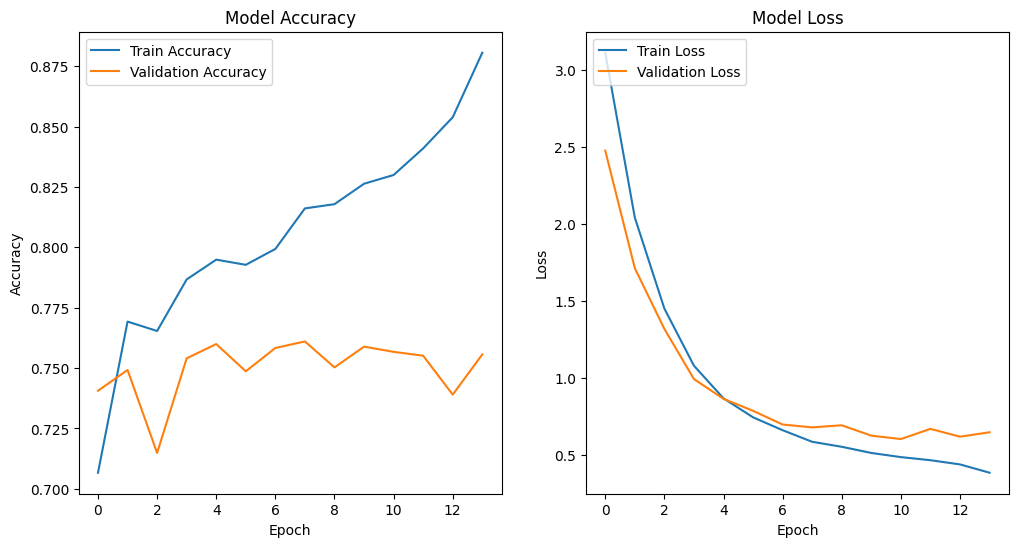

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Bidirectional, LSTM, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

model = Sequential()
model.add(Bidirectional(LSTM(512, input_shape=(X_train_embeddings.shape[1], X_train_embeddings.shape[2]), return_sequences=True)))
model.add(LSTM(256))
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dense(16, activation='relu', kernel_regularizer='l2'))
#model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

history = model.fit(X_train_embeddings, y_train, epochs=20, batch_size=128,
                    validation_data=(X_test_embeddings, y_test), verbose=2,
                    callbacks=[early_stopping, reduce_lr])

y_pred_prob = model.predict(X_test_embeddings)
y_pred = (y_pred_prob > 0.5).astype("int32")
y_pred = y_pred.flatten()

print("Deep Learning Model Performance with TF-IDF:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()


(119168,)